In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv("AttendanceMarksSA.csv")
print("First 5 rows of dataset:")
display(df.head())

print("\nColumns in dataset:")
print(df.columns)

First 5 rows of dataset:


,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44



Columns in dataset:
Index(['Attendance', 'MSE', 'ESE'], dtype='object')


In [6]:
target_col = 'MSE'   # <-- change this if your dataset has a different target column
if target_col not in df.columns:
    raise ValueError(f"⚠️ Please update 'target_col' to match your dataset column name. Available columns: {list(df.columns)}")

X = df.drop(columns=[target_col]).values
y = df[target_col].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
ols_model = LinearRegression()
ols_model.fit(X_train_scaled, y_train)
y_pred_ols = ols_model.predict(X_test_scaled)

print("\n--- OLS RESULTS ---")
print("Coefficients:", ols_model.coef_)
print("Intercept:", ols_model.intercept_)
print("R2 Score:", r2_score(y_test, y_pred_ols))
print("MSE:", mean_squared_error(y_test, y_pred_ols))


--- OLS RESULTS ---
Coefficients: [0.21926173 2.14488221]
Intercept: 9.5
R2 Score: 0.46847252077126
MSE: 6.227139712208705


In [15]:
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

In [16]:
theta = np.zeros(X_b.shape[1])
alpha = 0.01     # learning rate
epochs = 1000
m = len(y_train)
cost_history = []

for i in range(epochs):
    y_pred = X_b.dot(theta)
    error = y_pred - y_train
    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)
    gradients = (1/m) * X_b.T.dot(error)
    theta -= alpha * gradients

In [17]:
y_pred_gd = X_test_b.dot(theta)

print("\n--- GRADIENT DESCENT RESULTS ---")
print("Theta values:", theta)
print("R2 Score:", r2_score(y_test, y_pred_gd))
print("MSE:", mean_squared_error(y_test, y_pred_gd))


--- GRADIENT DESCENT RESULTS ---
Theta values: [9.49958987 0.21918167 2.14476019]
R2 Score: 0.4684203857354101
MSE: 6.227750503117595


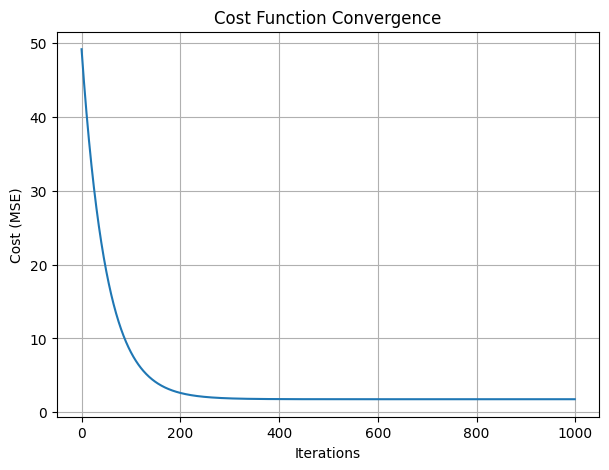

In [18]:
plt.figure(figsize=(7,5))
plt.plot(range(epochs), cost_history)
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()